Data Mining project  
AY 2022/23  
Task 1  
Group 12  
Leonardo Vona  
545042  

January 8. 2023

# **Data understanding**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import entropy

In [2]:
tweets_df = pd.read_csv('./tweets.csv', sep=',')

In [3]:
users_df = pd.read_csv('./users.csv', sep=',')

I did not use the attribute **id** as index for the tweets data set because it does not contain unique values. For the users data set instead I did not use it in order to be able to manipulate it when merging with the other data frame.

## **Types of the attributes**

#### *Tweets data frame*

In [4]:
tweets_df.head()

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
1,583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
2,461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
3,528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
4,575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [5]:
tweets_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   id              13664694 non-null  object
 1   user_id         13447413 non-null  object
 2   retweet_count   13227562 non-null  object
 3   reply_count     13016818 non-null  object
 4   favorite_count  13017154 non-null  object
 5   num_hashtags    12607172 non-null  object
 6   num_urls        13016073 non-null  object
 7   num_mentions    12810531 non-null  object
 8   created_at      13664696 non-null  object
 9   text            13126975 non-null  object
dtypes: object(10)
memory usage: 1.0+ GB


Categorical attributes:
*   id: ***String***
*   user_id: ***String***
*   text: ***String***

Numerical attributes:
* retweet_count: ***String***, then ***Int***
* reply_count: ***String***, then ***Int***
* favorite_count: ***String***, then ***Int***
* num_hashtags: ***String***, then ***Int***
* num_urls: ***String***, then ***Int***
* num_mentions: ***String***, then ***Int***
* created_at: ***String***, then ***Datetime***






#### *Users data frame*

In [6]:
users_df.head()

,id,name,lang,bot,created_at,statuses_count
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


In [7]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


Categorical attributes:
*   id: ***int***, then ***String***
*   name: ***String***
*   lang: ***String***
*   bot: ***int***, then ***String***


Numerical attributes:
* created_at: ***String***, then ***Datetime***
* statuses_count: ***float***, then ***Int***






### **Type conversion**

The numerical attributes that are recognized as Strings are converted to the correct type, coercing eventual errors (a value that cannot be converted to numeric is replaced with NaN).

#### *Tweets data frame*

In [8]:
for feature in ['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions']:
  tweets_df[feature] = pd.to_numeric(tweets_df[feature], errors='coerce')

tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'], infer_datetime_format=True, errors='coerce')

In [9]:
tweets_df.dtypes

id                        object
user_id                   object
retweet_count            float64
reply_count              float64
favorite_count           float64
num_hashtags             float64
num_urls                 float64
num_mentions             float64
created_at        datetime64[ns]
text                      object
dtype: object

#### *Users data frame*

In [10]:
users_df['created_at'] = pd.to_datetime(users_df['created_at'], infer_datetime_format=True, errors='coerce')

In [11]:
users_df["id"] = users_df["id"].apply(str)
users_df["bot"] = users_df["bot"].apply(str)

In [12]:
users_df.dtypes

id                        object
name                      object
lang                      object
bot                       object
created_at        datetime64[ns]
statuses_count           float64
dtype: object

The numerical attributes that should be Int are recognized as Float. This is because they contain null values, and NaN is a float in Python. The problem will be solved later when missing values will be handled.

## **Data quality**

### **Syntactic accuracy**

#### *Tweets data frame*

For what concerns the attributes ***retweet_count***. ***reply_count***, ***favorite_count***, ***num_hashtags***, ***num_urls***, ***num_mentions*** and ***created_at*** the entries not in the domain of the features were automatically converted to NaN in the type conversion phase.

##### **user_id**

The twitter user ID is numerical; then the tweets that has a non numeric user id have been dropped.  
We first need to remove nan values from **user_id** feature, otherwise the process will fail. The tweets containing NaN as **user_id** have been dropped because the scope of the project is to analyze the user behavior, then the tweets with no user associated are not useful.

In [13]:
tweets_df = tweets_df.dropna(subset=['user_id'])

In [14]:
tweets_df = tweets_df.drop(tweets_df[~tweets_df['user_id'].str.isnumeric()].index)

### **Semantic accuracy**

#### *Tweets data frame*

From the statistics of the numerical attributes it is possible to see that there are many errors that must be corrected. For example, a negative value for the **favorite_count** is not admitted.

In [15]:
tweets_df.describe()

,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,12712031.0,12576223.0,1.257729e+07,1.231601e+07,1.257646e+07,1.244474e+07
mean,inf,inf,5.565586e+204,5.683657e+146,7.951364e+202,4.821312e+80
std,NaN,NaN,inf,1.994633e+150,inf,1.700820e+84
min,0.0,0.0,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,inf,inf,7.000000e+211,7.000000e+153,1.000000e+210,6.000000e+87


##### **Retweet_count**

retweet_count contains at least a value *'inf'*.  
In particular, with a simple search on the Web, I discovered that the most-retweeted tweet has 4.0 M retweets.

In [16]:
len(tweets_df[tweets_df['retweet_count'] >= 4100000])

39

There are 39 tweets with a number of retweets above the maximum. These wrong values are replaced with NaN.

In [17]:
tweets_df.loc[tweets_df.retweet_count >= 4100000, 'retweet_count'] = np.nan

##### **Reply_count**

Regarding reply_count I did not find any maximum admitted value on the Twitter documentation. Anyway, the feature contains at least an *'inf'* value, and has to be removed.

In [19]:
len(tweets_df[tweets_df['reply_count'] == np.inf])

1

In [18]:
tweets_df.loc[tweets_df.reply_count == np.inf, 'reply_count'] = np.nan

##### **Favorite_count**

From the statistics it is possible to see that there is at least one tweet with a negative value of likes, which is not admitted. 
Searching on the Web, I discovered that the most liked-tweet has 7.1 M likes.

In [21]:
len(tweets_df[(tweets_df['favorite_count'] < 0) | (tweets_df['favorite_count'] >= 7200000)])

43

There are 43 tweets with a number of likes above the maximum. There is 1 tweet with a negative number of likes. These wrong values are replaced with NaN.

In [19]:
tweets_df.loc[(tweets_df['favorite_count'] < 0) | (tweets_df['favorite_count'] >= 7200000), 'favorite_count'] = np.nan

##### **Num_hashtags**

The maximum number of characters allowed for a tweet actually is 280. Then there could be (roughly) at most 140 hashtags.

In [23]:
len(tweets_df[tweets_df['num_hashtags'] > 140])

318

There are 318 tweets with a number of hashtags above the limit. These wrong values are replaced with NaN.

In [20]:
tweets_df.loc[tweets_df.num_hashtags > 140, 'num_hashtags'] = np.nan

##### **Num_urls**

Twitter allows to post tweets with at most 10 links.

In [25]:
len(tweets_df[tweets_df['num_urls'] > 10])

555

There are 555 tweets with a number of links above the limit. These wrong values are replaced with NaN.

In [21]:
tweets_df.loc[tweets_df.num_urls > 10, 'num_urls'] = np.nan

##### **Num_mentions**

It is possible to mention only up to 10 users per tweet.

In [27]:
len(tweets_df[tweets_df['num_mentions'] > 10])

1301

There are 1301 tweets with a number of mentions above the limit. These wrong values are replaced with NaN.

In [22]:
tweets_df.loc[tweets_df.num_mentions > 10, 'num_mentions'] = np.nan

##### **Created_at**

The range of valid dates for a tweet publication has been set between the date of the first tweet (2006-03-21) and the release date of the project (2022-09-30).

In [29]:
len(tweets_df[(tweets_df['created_at'] < '2006-03-21') | (tweets_df['created_at'] > '2022-09-30')])

97605

There are 97605 tweets with an unvalid publication date. These wrong values are replaced with NaN.

In [23]:
tweets_df.loc[(tweets_df['created_at'] < '2006-03-21') | (tweets_df['created_at'] > '2022-09-30'), 'created_at'] = np.nan

In addition, a tweet should have been published after the creation date of the user who is associated to.

In [31]:
joined_df = pd.merge(tweets_df, users_df, left_on="user_id", right_on="id", how="left")

In [32]:
len(joined_df[joined_df['created_at_x'] < joined_df['created_at_y']])

0

There are no tweets matching this condition.

#### *Users data frame*

In [24]:
users_df.describe()

,statuses_count
count,11109.000000
mean,5883.312359
std,19073.007305
min,0.000000
25%,41.000000
50%,68.000000
75%,2916.000000
max,399555.000000


##### **Lang**

In [25]:
users_df.lang.unique()

array(['en', 'it', 'fr', 'ru', 'es', 'tr', 'en-gb', 'pt', 'nl', 'id',
       'zh-tw', 'ja', 'de', 'ko', 'en-AU', 'da', 'ar', 'en-GB',
       'Select Language...', 'zh-TW', 'zh-cn', 'pl', 'el', 'fil', 'sv',
       'xx-lc'], dtype=object)

The labels 'en-GB' and 'en-gb' refer to the same language. Same for 'zh-TW' and 'zh-tw'.

In [26]:
users_df["lang"].replace({"en-GB": "en-gb", "zh-TW": "zh-tw"}, inplace=True)

In [27]:
users_df[users_df["lang"] == "Select Language..."]

,id,name,lang,bot,created_at,statuses_count
4166,2956613720,Leanne Arker,Select Language...,0,2020-01-05 00:09:59,57.0
8666,2904858613,Brooke,Select Language...,0,2019-11-22 05:44:46,85.0


The default label 'Select Language...' has been replaced with 'en'. I selected English because it is the language used by both users with the uncorrect label to write their tweets.

In [28]:
users_df["lang"].replace({"Select Language...": "en"}, inplace=True)

##### **Created_at**

A user creation date can't be before the date of the first tweet (2006-03-21) or after the publication date of the project (2022-09-30).

In [29]:
len(users_df[(users_df['created_at'] < '2006-03-21') | (users_df['created_at'] > '2022-09-30')])

0

There are no user matching this condition.

### **Duplicate data**

#### *Tweets data frame*

In [30]:
tweets_df.shape[0]

13230683

Two tweets are considered equal if they have the same value for the attributes **user_id**, **created_at** and **text**.  
Between two (or more) duplicate tweets, I pick the one with less NaN values for the numerical features.  
The approach is to order (descending) the tweets by the numerical features, considering NaN as the smallest value, and keep only the first tweet between duplicated ones.

In [31]:
tweets_df = tweets_df \
  .sort_values(by=['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions'], na_position='last') \
  .drop_duplicates(subset=['user_id', 'created_at', 'text']) \
  .sort_index()

In [32]:
tweets_df.shape[0]

10230135

After the process, ~ 3M duplicated tweets were removed.

#### *Users data frame*

Two users are considered equal even if they have a different value for the **id** attribute.

In [33]:
len(users_df[users_df.duplicated(subset=['id'])])

0

In the dataset there aren't duplicate users.

### **Statistics & visualization**

#### *Tweets data frame*

In [44]:
tweets_df.describe()

,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,1.012323e+07,9.988068e+06,1.011654e+07,9.856659e+06,9.987744e+06,9.856065e+06
mean,5.768485e+02,1.576719e+03,1.874290e+00,1.762635e-01,1.645079e-01,5.262290e-01
std,1.423257e+04,3.330297e+06,2.875191e+02,6.198975e-01,3.774178e-01,8.097219e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,3.350111e+06,9.200000e+09,1.353000e+05,2.800000e+01,7.000000e+00,1.000000e+01


##### **Data distribution**

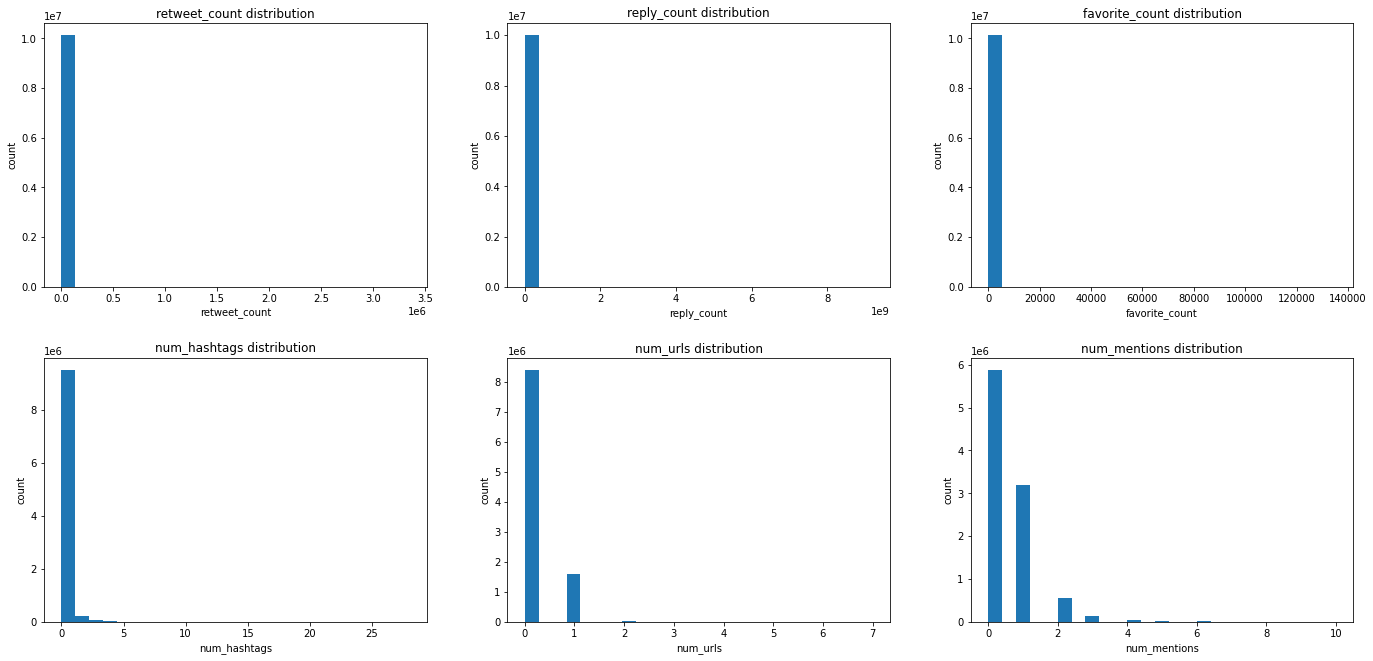

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
fig.tight_layout(pad=5.0)

num_features = ['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions']

for i, row in enumerate(np.reshape(num_features, (2,3))):
  for j, feature in enumerate(row):
    ax[i][j].hist(tweets_df[feature], bins='sturges')
    ax[i][j].set_title('{} distribution'.format(feature))
    ax[i][j].set_xlabel(feature)
    ax[i][j].set_ylabel('count')

plt.show()

All the attributes show a highly positive skewed distribution, as expected. This is because for all these numerical features, it is very common that most tweets have a value of 0.

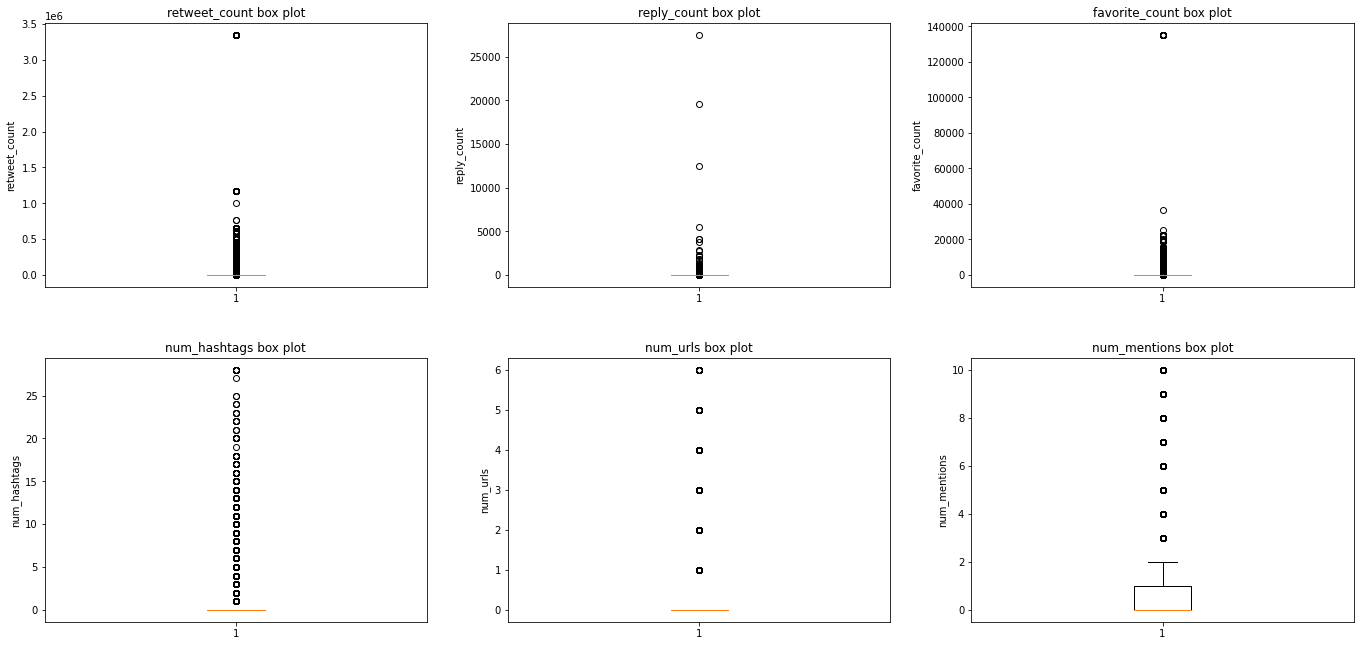

In [46]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
fig.tight_layout(pad=5.0)

vis_df = tweets_df.dropna()

num_features = ['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions']

for i, row in enumerate(np.reshape(num_features, (2,3))):
  for j, feature in enumerate(row):
    ax[i][j].boxplot(vis_df[feature])
    ax[i][j].set_title('{} box plot'.format(feature))
    ax[i][j].set_ylabel(feature)

plt.show()

The interquartile range (IQR) is a more robust estimate of the spread of the values with respect to the standard deviation. From the box plot above it is possible to see that it is 0 for **reply_count**, **favorite_count**, **num_hashtags**, **num_urls** and 1 for **retweet_count**, **num_mentions**.
This means that the distribution for these features is very skewed towards 0 (1).

In [47]:
skew_kurt_df = pd.DataFrame()

skew_kurt_df['Feature'] = ['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions']

skew_kurt_df['Skewness']  = [round(tweets_df[feature].skew(), 2) for feature in skew_kurt_df['Feature']]

skew_kurt_df['Kurt']  = [round(tweets_df[feature].kurt(), 2) for feature in skew_kurt_df['Feature']]

skew_kurt_df

,Feature,Skewness,Kurt
0,retweet_count,158.98,35396.39
1,reply_count,2452.39,6340461.53
2,favorite_count,431.73,199166.26
3,num_hashtags,6.12,63.42
4,num_urls,1.98,2.83
5,num_mentions,2.88,16.43


###### **created_at**

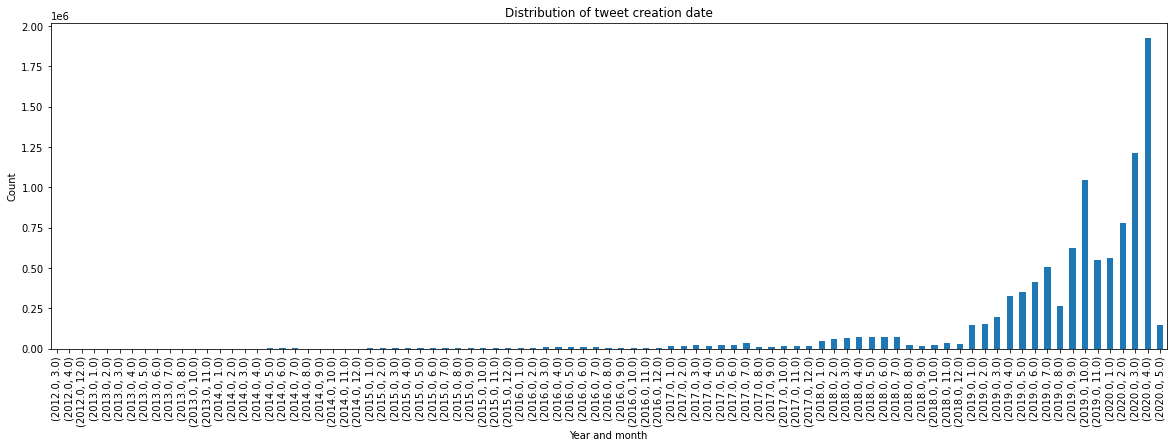

In [48]:
plt.figure(figsize=(20, 6))
tweets_df['created_at'].groupby([tweets_df.created_at.dt.year, tweets_df.created_at.dt.month]).agg('count').plot(kind="bar")
plt.title("Distribution of tweet creation date")
plt.xlabel("Year and month")
plt.ylabel("Count")
plt.show()

There is a peak of tweets publication in April 2020.

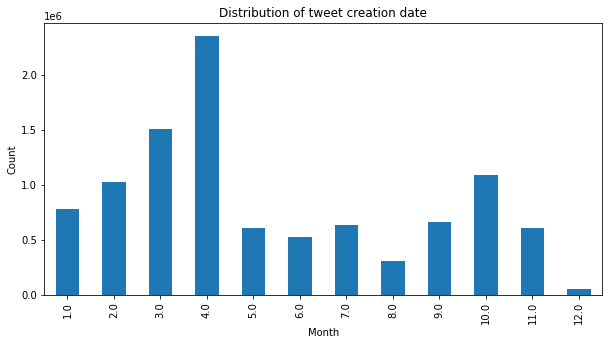

In [49]:
plt.figure(figsize=(10, 5))
tweets_df['created_at'].groupby([tweets_df.created_at.dt.month]).agg('count').plot(kind="bar")
plt.title("Distribution of tweet creation date")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

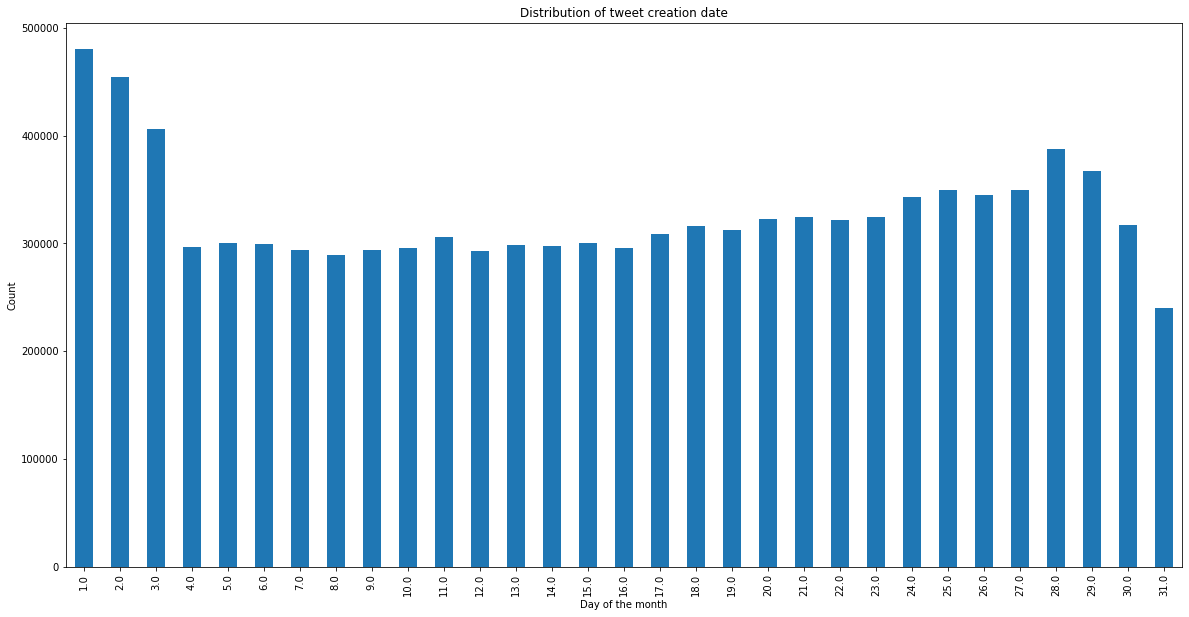

In [50]:
plt.figure(figsize=(20, 10))
tweets_df['created_at'].groupby([tweets_df.created_at.dt.day]).agg('count').plot(kind="bar")
plt.title("Distribution of tweet creation date")
plt.xlabel("Day of the month")
plt.ylabel("Count")
plt.show()

From the distribution it seems that there is an increase of tweets published at the beginning of the month. It is normal to see a decrease for the 31st day of the month, because not all months have 31 days.

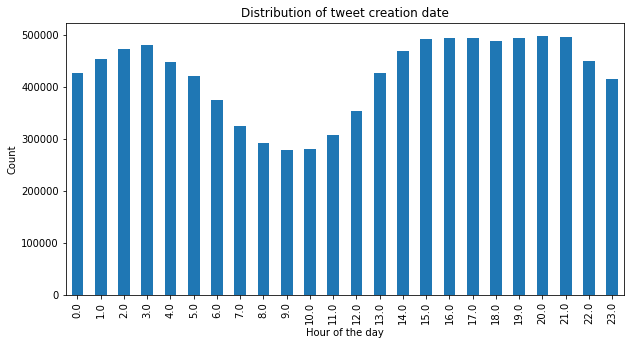

In [51]:
plt.figure(figsize=(10, 5))
tweets_df['created_at'].groupby([tweets_df.created_at.dt.hour]).agg('count').plot(kind="bar")
plt.title("Distribution of tweet creation date")
plt.xlabel("Hour of the day")
plt.ylabel("Count")
plt.show()

The number of tweets published in the morning is significantly lower with respect to the rest of the day.

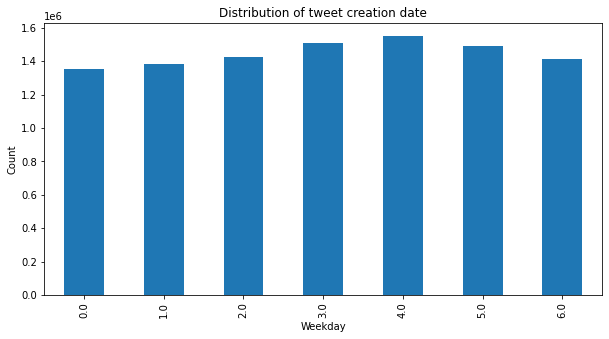

In [52]:
plt.figure(figsize=(10, 5))
tweets_df['created_at'].groupby([tweets_df.created_at.dt.weekday]).agg('count').plot(kind="bar")
plt.title("Distribution of tweet creation date")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.show()

From the distribution it is possible to see that the day where most tweets are published is Friday, which seems likely.

##### **AAD, MAD**

In [53]:
AAD = lambda feature: np.mean(np.absolute(feature - np.mean(feature)))
MAD = lambda feature: np.nanmedian(np.absolute(feature - np.mean(feature)))

aad_mad_std_df = pd.DataFrame()

aad_mad_std_df['Feature'] = ['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions']

aad_mad_std_df['AAD'] = [round(AAD(tweets_df[feature]), 2) for feature in aad_mad_std_df['Feature']]
aad_mad_std_df['MAD'] = [round(MAD(tweets_df[feature]), 2) for feature in aad_mad_std_df['Feature']]
aad_mad_std_df['std'] = [round(np.std(tweets_df[feature]), 2) for feature in aad_mad_std_df['Feature']]

aad_mad_std_df

,Feature,AAD,MAD,std
0,retweet_count,1080.47,576.85,14232.57
1,reply_count,3153.40,1576.72,3330296.70
2,favorite_count,3.21,1.87,287.52
3,num_hashtags,0.31,0.18,0.62
4,num_urls,0.28,0.16,0.38
5,num_mentions,0.63,0.53,0.81


The AAD and MAD measures give more significant insights in the data distribution with respect to the standard deviation because they are less sensitive to outliers. In particular, it is possible to see that for the **reply_count** feature, the standard deviation is very high due to outliers values.

##### **Correlation analysis**

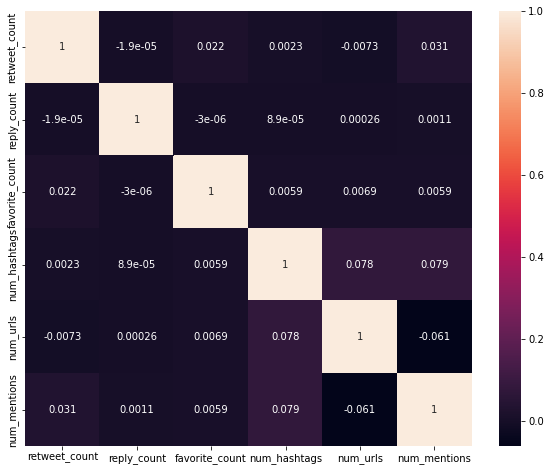

In [54]:
fig, ax = plt.subplots(figsize=(10,8)) 
sn.heatmap(tweets_df.corr(), annot=True, ax=ax)
plt.show()

The attributes seem very uncorrelated between each other, with values near to 0, apart from favorite_count and retweet_count, which is sound because a tweet with an high number of retweets will likely also have an high number of likes.

#### *Users data frame*

In [55]:
users_df.describe()

,statuses_count
count,11109.000000
mean,5883.312359
std,19073.007305
min,0.000000
25%,41.000000
50%,68.000000
75%,2916.000000
max,399555.000000


##### **Data distribution**

###### **Bot**

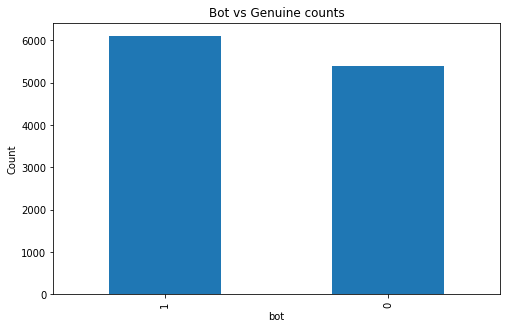

In [56]:
users_df['bot'].value_counts().plot(kind='bar',
                                    title='Bot vs Genuine counts',
                                    xlabel='bot',
                                    ylabel='Count',
                                    figsize=(8,5))
plt.show()

The ratio between bots and genuine users seems quite balanced, with around 10% more bots than genuine users.

###### **statuses_count**

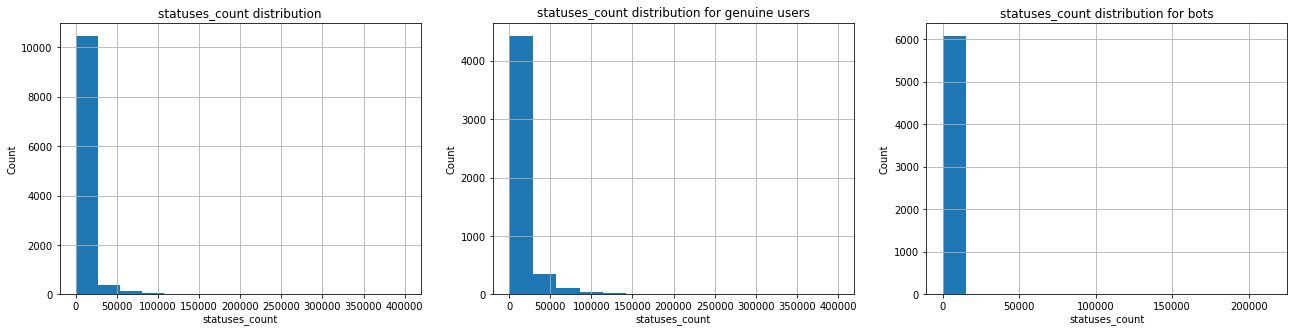

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))

users_df['statuses_count'].hist(ax=ax[0], bins='sturges')
ax[0].set_title('statuses_count distribution')
ax[0].set_xlabel('statuses_count')
ax[0].set_ylabel('Count')

users_df[users_df['bot'] == '0']['statuses_count'].hist(ax=ax[1], bins='sturges')
ax[1].set_title('statuses_count distribution for genuine users')
ax[1].set_xlabel('statuses_count')
ax[1].set_ylabel('Count')

users_df[users_df['bot'] == '1']['statuses_count'].hist(ax=ax[2], bins='sturges')
ax[2].set_title('statuses_count distribution for bots')
ax[2].set_xlabel('statuses_count')
ax[2].set_ylabel('Count')

plt.show()

The presence of outliers doesn't allow to visualize clearly the distribution for the **statuses_count** feature. Anyway the distribution is clearly highly skewed towards 0, as expected.  
Comparing the distribution of statuses_count for the bot and genuine users, it looks like that genuine users tend to have a number of tweets published higher with respect to bots.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


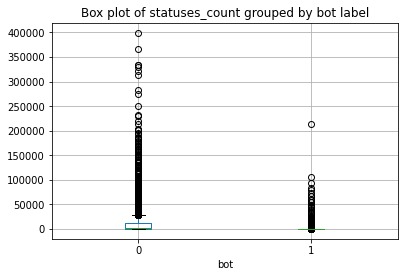

In [58]:
users_df.boxplot(column='statuses_count', by='bot')

plt.title('Box plot of statuses_count grouped by bot label')
plt.suptitle('')
plt.show()

In [59]:
AAD = lambda feature: np.mean(np.absolute(feature - np.mean(feature)))
MAD = lambda feature: np.nanmedian(np.absolute(feature - np.mean(feature)))

users_stat_df = pd.DataFrame()

users_stat_df['Feature'] = ['statuses_count']
users_stat_df['Skewness'] = users_df['statuses_count'].skew()
users_stat_df['Kurtois'] = users_df['statuses_count'].kurt()
users_stat_df['AAD'] = round(AAD(users_df['statuses_count']), 2)
users_stat_df['MAD'] = round(MAD(users_df['statuses_count']), 2)
users_stat_df['std'] = round(np.std(users_df['statuses_count']), 2)

users_stat_df

,Feature,Skewness,Kurtois,AAD,MAD,std
0,statuses_count,8.164069,100.626488,8637.31,5831.31,19072.15


###### **created_at**

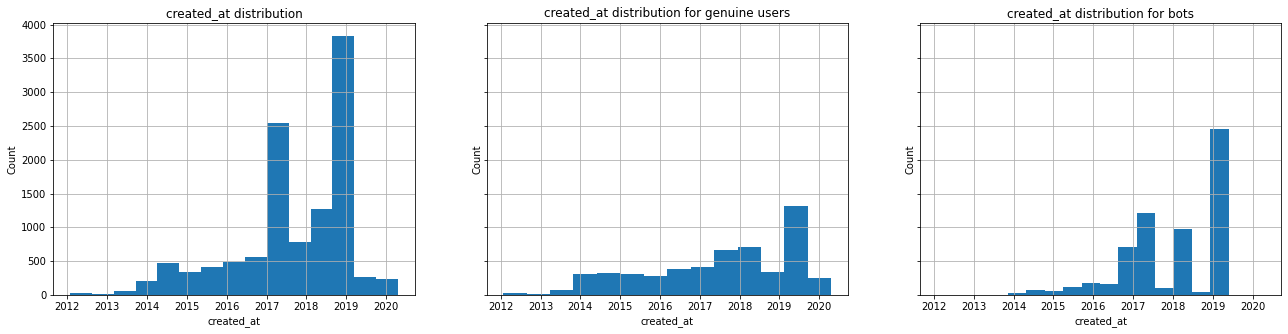

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22, 5), sharex=True, sharey=True)

users_df['created_at'].hist(ax=ax[0], bins='sturges')
ax[0].set_title('created_at distribution')
ax[0].set_xlabel('created_at')
ax[0].set_ylabel('Count')

users_df[users_df['bot'] == '0']['created_at'].hist(ax=ax[1], bins='sturges')
ax[1].set_title('created_at distribution for genuine users')
ax[1].set_xlabel('created_at')
ax[1].set_ylabel('Count')

users_df[users_df['bot'] == '1']['created_at'].hist(ax=ax[2], bins='sturges')
ax[2].set_title('created_at distribution for bots')
ax[2].set_xlabel('created_at')
ax[2].set_ylabel('Count')

plt.show()

There is a peak of bots created at the beginning of 2019, and a net decrease after that period. Genuine users instead seems to be more evenly distributed along time.

###### **lang**

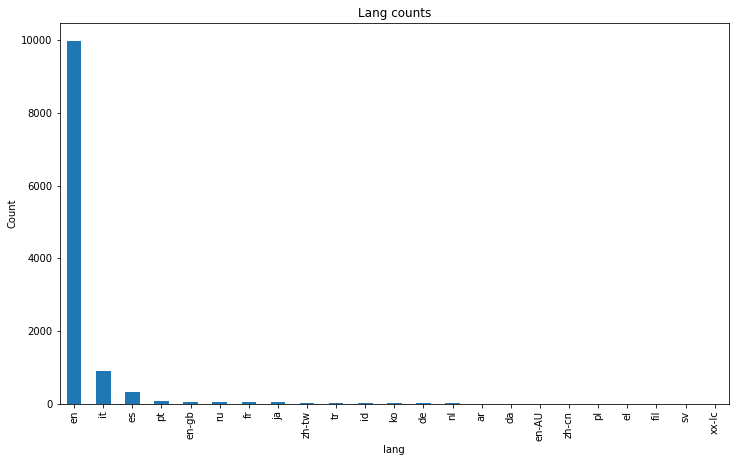

In [61]:
users_df['lang'].value_counts().plot(kind='bar',
                                    title='Lang counts',
                                    xlabel='lang',
                                    ylabel='Count',
                                    figsize=(12,7))
plt.show()

A large majority of the users are associated to the language 'en'. The other most frequent one are 'it' and 'es'.

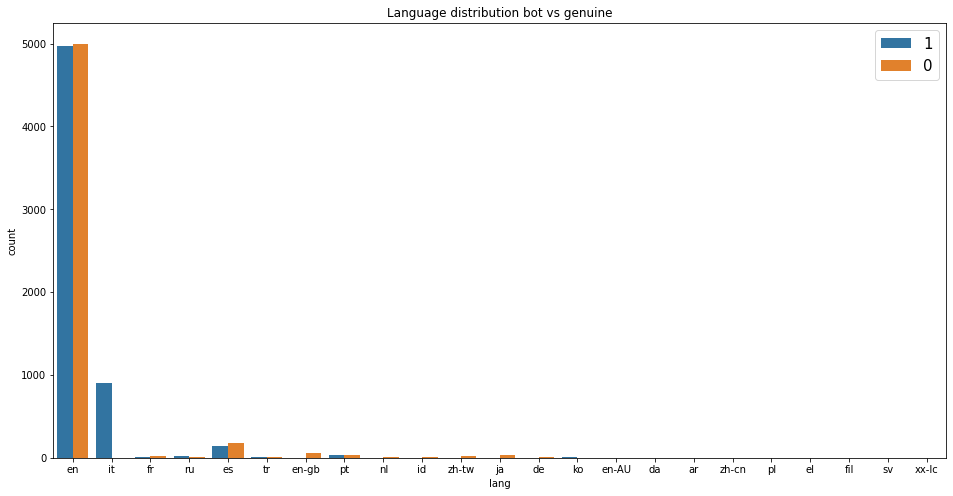

In [62]:
fig, ax = plt.subplots(figsize=(16,8)) 

sn.countplot(x=users_df['lang'], hue=users_df['bot'], ax=ax)

plt.title('Language distribution bot vs genuine')
plt.legend(loc='upper right', prop={'size': 15})
plt.show()

It is interesting to see that the users with Italian language are all (more than 900) labeled as bots.

### **Missing values**

#### *Tweets data frame*

In [34]:
tweets_df[tweets_df.isna().sum(axis=1) >= 1]

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
18,556759445964066816,438362574,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-20 10:26:10,NaN
32,iylbzyeiw,2214453095,1.0,0.0,2.0,NaN,NaN,NaN,2019-01-18 01:13:23,NaN
71,qnlquck,522419526,0.0,NaN,0.0,NaN,0.0,NaN,2019-10-15 13:18:57,NaN
161,mar,2211927324,0.0,NaN,NaN,NaN,NaN,NaN,2020-01-29 00:24:20,NaN
223,337410935437272894,14824425,0.0,0.0,0.0,1.0,0.0,1.0,NaT,@arvixesupport Shared SSL stopped working on a...
...,...,...,...,...,...,...,...,...,...,...
13664627,524128262,765917083,NaN,NaN,0.0,NaN,0.0,NaN,2020-04-04 05:47:00,NaN
13664657,5992581,96435556,0.0,NaN,0.0,NaN,NaN,NaN,2019-10-22 12:10:26,NaN
13664677,1361384041132445,1273204765,0.0,0.0,0.0,NaN,NaN,NaN,2019-10-01 05:59:03,NaN
13664679,98528797,486111271,0.0,0.0,1.0,0.0,0.0,2.0,NaT,@cnrsocial4 @socialsensing im fine thank you f...


There are 500K rows which contain at least a NaN value.

In [35]:
tweets_df[tweets_df['text'].isna()]

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
18,556759445964066816,438362574,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-20 10:26:10,NaN
32,iylbzyeiw,2214453095,1.0,0.0,2.0,NaN,NaN,NaN,2019-01-18 01:13:23,NaN
71,qnlquck,522419526,0.0,NaN,0.0,NaN,0.0,NaN,2019-10-15 13:18:57,NaN
161,mar,2211927324,0.0,NaN,NaN,NaN,NaN,NaN,2020-01-29 00:24:20,NaN
251,586077843248606060,465323067,NaN,0.0,NaN,NaN,NaN,NaN,2019-11-01 15:42:16,NaN
...,...,...,...,...,...,...,...,...,...,...
13664466,64788555127540247,220116356,0.0,0.0,NaN,NaN,NaN,NaN,2019-10-15 22:52:03,NaN
13664627,524128262,765917083,NaN,NaN,0.0,NaN,0.0,NaN,2020-04-04 05:47:00,NaN
13664657,5992581,96435556,0.0,NaN,0.0,NaN,NaN,NaN,2019-10-22 12:10:26,NaN
13664677,1361384041132445,1273204765,0.0,0.0,0.0,NaN,NaN,NaN,2019-10-01 05:59:03,NaN


From a quick analysis, it emerges that a tweet containing NaN text will likely be an unvalid tweet (with also other values not valid, not so significant for the user profiling). There are ~ 400k of them, which is less than 5% of the total dataset, so I have chosen to remove these tweets.

In [36]:
tweets_df = tweets_df.drop(tweets_df[tweets_df['text'].isna()].index)

For the numerical features containing NaN values, it is possible to fill the missing values using as substitution value the mode (instead of the mean, which is more sensible to outliers) of the feature for each user.

In [37]:
for feature in ['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions']:
  tweets_df[feature] = tweets_df[feature].fillna(tweets_df.groupby('user_id')[feature].aggregate(pd.Series.mode))

For the **created_at** feature instead, the mean is more meaningful, and the outliers have been already removed, so I used it.

In [38]:
tweets_df['created_at'] = tweets_df['created_at'].fillna(tweets_df.groupby('user_id')['created_at'].transform('mean'))

In [39]:
tweets_df.isna().any()

id                False
user_id           False
retweet_count      True
reply_count        True
favorite_count     True
num_hashtags       True
num_urls           True
num_mentions       True
created_at        False
text              False
dtype: bool

In [40]:
len(tweets_df[tweets_df.isna().sum(axis=1) >= 1])

1222

There are still 1222 tweets with at least a NaN value (because the users which are associated to have only that tweet in the dataset, so it is not possible to fill the missing values with the approach used above).  
Having a look at these entries it is likely that these are erroneous data, which are not associated to users recorded in the users data frame, so I have chosen to drop these tweets.

In [41]:
tweets_df = tweets_df.dropna()

##### **Correct attribute types**

Given that there are not NaN values anymore, we can correct the type of the features recognized as Float to Int, as it should be.

In [42]:
tweets_df = tweets_df.round(0).astype({"retweet_count":'int', "reply_count":'int', "favorite_count":'int', "num_hashtags":'int', "num_urls":'int', "num_mentions":'int'}) 

In [43]:
tweets_df.dtypes

id                        object
user_id                   object
retweet_count              int64
reply_count                int64
favorite_count             int64
num_hashtags               int64
num_urls                   int64
num_mentions               int64
created_at        datetime64[ns]
text                      object
dtype: object

#### *Users data frame*

In [44]:
users_df.isna().any()

id                False
name               True
lang              False
bot               False
created_at        False
statuses_count     True
dtype: bool

In [45]:
users_df[users_df['name'].isna()]

,id,name,lang,bot,created_at,statuses_count
1535,2166124159,NaN,en,0,2018-11-02 06:39:14,6566.0


There is only one user which has no associated name. Since it is a categorical attribute and it does not influence the users profiling, I have chosen to assign the id as the name for this entry.

In [46]:
users_df['name'] = users_df['name'].fillna('2166124159')

For the statuses_count instead I filled NaN values with the mode value.

In [47]:
users_df['statuses_count'].fillna(users_df['statuses_count'].mode()[0], inplace=True)

##### **Correct attribute types**

I correct the attribute type for the statuses_count feature, which now can be set as Int.

In [48]:
users_df = users_df.round(0).astype({"statuses_count":'int'}) 

### **Separate tweets data frame**

The tweets have a different behavior with respect to retweets (which are naively identified if the text is starting with 'RT @'). In particular they have an high retweet_count, and associating them to users who have retweeted them may create problems in the user profiling.

If we separate tweets and retweets we hopefully will be able to recognize better the behavior of an user. 

In [49]:
retweets_df = tweets_df[tweets_df['text'].str.startswith("RT @")]

In [50]:
tweets_df = tweets_df[~tweets_df['text'].str.startswith("RT @")]

In [51]:
tweets_df.describe()

,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,8.003269e+06,8.003269e+06,8.003269e+06,8.003269e+06,8.003269e+06,8.003269e+06
mean,3.520508e-01,1.770901e-03,6.354708e-01,1.378008e-01,1.598366e-01,3.526358e-01
std,9.974723e+00,4.722104e-02,5.489995e+00,5.569343e-01,3.717076e-01,6.964188e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,2.195700e+04,2.400000e+01,6.223000e+03,2.800000e+01,6.000000e+00,1.000000e+01


In [52]:
retweets_df.describe()

,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,1.814587e+06,1.814587e+06,1.814587e+06,1.814587e+06,1.814587e+06,1.814587e+06
mean,3.124397e+03,9.637896e-02,6.719875e+00,3.458109e-01,1.850823e-01,1.296983e+00
std,3.274778e+04,2.819484e+01,6.337392e+02,8.219140e-01,4.010091e-01,8.286846e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,3.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,5.760000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,3.350111e+06,2.751600e+04,1.353000e+05,2.800000e+01,6.000000e+00,1.000000e+01


### **Outlier detection**

#### *Tweets data frame*

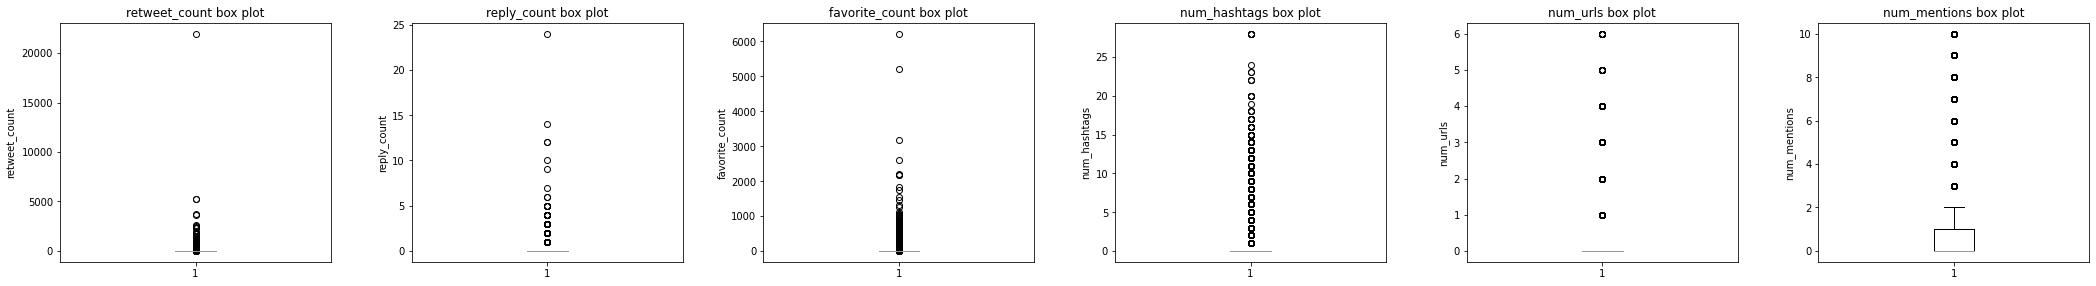

In [53]:
features = ['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions']

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(30,5))
fig.tight_layout(pad=5.0)

for i, feature in enumerate(features):
  ax[i].boxplot(tweets_df[feature])
  ax[i].set_title('{} box plot'.format(feature))
  ax[i].set_ylabel(feature)

plt.show()

It is not likely that a tweet has a number of retweets greater than 1000 and a number of likes less than 10. These outliers values for the retweet_count are considered wrong data and removed.

In [54]:
tweets_df[(tweets_df['retweet_count'] > 1000) & (tweets_df['favorite_count'] < 10)].sort_values(by='retweet_count')

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
3091964,552563405349863424,2482378631,1127,0,7,1,0,0,2020-01-08 20:32:36,يالله شدو حيلكم
12836321,552561107320057856,2482378631,1139,0,0,1,0,0,2020-01-08 20:23:28,زين عرفنا
5385155,551337058413731840,2482378631,1310,0,7,1,0,0,2020-01-05 11:19:32,ايش سالفت الوسم! ومين عاطف هذا\n\n #عاطف_المسم...
2383897,552741457174360065,221475117,1461,0,9,1,0,0,2020-01-09 08:20:07,شو سالفة هالهشتااق!! #عاطف_المسمار_تدفئو_زين_...
4238520,593648761727033344,476876406,1725,0,0,0,0,0,2020-05-01 05:31:08,This Tweet from @AgentSwift47 has been withhel...
9178321,593557722399903745,832472995,1731,0,0,0,0,0,2020-04-30 23:29:23,This Tweet from @RandyS0725 has been withheld ...
2324565,567098299497586688,585912212,2351,0,0,0,0,0,2020-02-17 23:09:05,This Tweet from @A1_Ade has been withheld in r...
5973305,567133647351083008,462534253,2351,0,0,0,0,0,2020-02-18 01:29:33,This Tweet from @Al_FSU has been withheld in r...
5020520,574645842935554048,1311456667,5295,0,0,0,0,0,2020-03-09 19:00:20,This Tweet from @Cassie_G98 has been withheld ...
6532447,574565539722358784,227055399,5299,0,0,0,0,0,2020-03-09 13:41:14,This Tweet from @laurrkat has been withheld in...


In [55]:
tweets_df.loc[(tweets_df['retweet_count'] > 1000) & (tweets_df['favorite_count'] < 10), 'retweet_count'] = np.nan

For what concerns reply_count and favorite_count, analyzing the entries with values which may be uncorrect I did not find any evident error.  
For the rest of the features instead (num_hashtags, num_urls, num_mentions, created_at) the are no outliers since they were removed in the phase of semantic accuracy assessing.

#### *Users data frame*

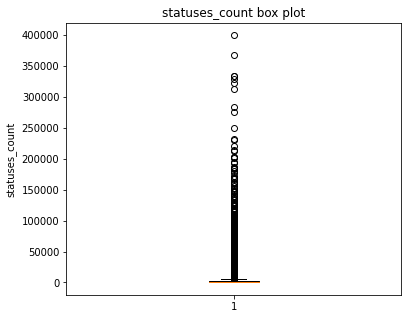

In [56]:
fig, ax = plt.subplots(figsize=(6,5))

ax.boxplot(users_df['statuses_count'])
ax.set_title('statuses_count box plot')
ax.set_ylabel('statuses_count')

plt.show()

The statuses_count attribute contains some outliers values, but I have decided to keep them because they can be valid values for particularly active users and may be significative for the user profiling.

## **New features**

After the cleaning of the data it is possible now to create new indicators which may be helpful in discriminating users' behavior.

I first merge the tweets and users data frame with a right join, so that only the tweets that have a correspondent user in the users dataset are picked.  
After the merging, the resulting data set is grouped by **user_id**, in order to easily extract the interesting new features.

In [57]:
grouped_df = pd.merge(tweets_df, users_df, left_on="user_id", right_on="id", how="right").groupby('id_y', sort=False)

### **num_tweets**

The feature num_tweets counts the number of tweets associated to the user.

In [58]:
users_df['num_tweets'] = grouped_df['user_id'].count().values

### **num_retweets**

num_retweets counts the number of retweets associated to each user. To obtain the value I merge the users and the retweets data frames similarly as before, and then retrieve the values.

In [59]:
grouped_rt_df = pd.merge(retweets_df, users_df, left_on="user_id", right_on="id", how="right").groupby('id_y', sort=False)

users_df['num_retweets'] = grouped_rt_df['user_id'].count().values

del grouped_rt_df

### **avg_tweets_per_day**

avg_tweets_per_day stores the average number of tweets per day for each user. To calculate the average first I retrieve the datetime of the first and the last tweet, and then divide num_tweets by the interval (in days) between the first and last tweet.

In [60]:
users_df = users_df.assign(first_tweet_at=grouped_df['created_at_x'].min().values)
users_df = users_df.assign(last_tweet_at=grouped_df['created_at_x'].max().values)

users_df['avg_tweets_per_day'] = users_df['num_tweets'] / ((users_df['last_tweet_at'] - users_df['first_tweet_at']).dt.days + 1)

del users_df['first_tweet_at']
del users_df['last_tweet_at']

### **avg_[retweets/replies/favorites/hashtags/mentions/urls]_per_tweet**

For each numerical feature of the tweets data frame (except created_at) I create a new attribute containing the average of that feature per tweet.

In [61]:
users_df['avg_retweets_per_tweet'] = grouped_df['retweet_count'].sum().values / users_df['num_tweets']
users_df['avg_replies_per_tweet'] = grouped_df['reply_count'].sum().values / users_df['num_tweets']
users_df['avg_favorites_per_tweet'] = grouped_df['favorite_count'].sum().values / users_df['num_tweets']
users_df['avg_hashtags_per_tweet'] = grouped_df['num_hashtags'].sum().values / users_df['num_tweets']
users_df['avg_mentions_per_tweet'] = grouped_df['num_mentions'].sum().values / users_df['num_tweets']
users_df['avg_urls_per_tweet'] = grouped_df['num_urls'].sum().values / users_df['num_tweets']

### **cumulative_[retweets/replies/favorites/hashtags/mentions/urls]_per_tweet**

For each numerical feature of the tweets data frame (except created_at) I also create a new attribute containing the cumulative sum of that feature for each user.

In [62]:
users_df['cumulative_retweets'] = grouped_df['retweet_count'].sum().values
users_df['cumulative_replies'] = grouped_df['reply_count'].sum().values
users_df['cumulative_favorites'] = grouped_df['favorite_count'].sum().values
users_df['cumulative_hashtags'] = grouped_df['num_hashtags'].sum().values
users_df['cumulative_urls'] = grouped_df['num_urls'].sum().values
users_df['cumulative_mentions'] = grouped_df['num_mentions'].sum().values

### **avg_tweet_length**

avg_tweet_length contains the average tweet length for each user.

In [63]:
users_df['avg_tweet_length'] = grouped_df['text'].apply(lambda x: np.mean(x.str.len())).round(0).values

### **Entropy**

I associate to each user three entropy indicators for distinct properties. The properties are the variations in text length, publication rate and hour of publication of the tweet.

In [64]:
tweets_df['text_length'] = tweets_df['text'].str.len()

In [65]:
tweets_df['hour'] = tweets_df['created_at'].dt.hour

In [66]:
grouped_df = pd.merge(tweets_df, users_df, left_on="user_id", right_on="id", how="right").groupby('id_y', sort=False)

#### **entropy_hour**

To retrieve the entropy with respect to the hour of publication (and analogously with respect to the text length), I first count (for each user) for each distinct value of the hour (0 - 23) the number of occurrences, then I apply the entropy to the occurrences normalized as probabilities, diving them by the total number of tweets associated to the given user.

In [67]:
users_df['entropy_hour'] = grouped_df['hour'].aggregate(lambda x: np.unique(x, return_counts=True)).transform(lambda x: entropy(x[1]/sum(x[1]))).values

#### **entropy_text_length**

In [68]:
users_df['entropy_text_length'] = grouped_df['text_length'].aggregate(lambda x: np.unique(x, return_counts=True)).transform(lambda x: entropy(x[1]/sum(x[1]))).values

#### **entropy_publication_rate**

The entropy associated to the publication rate is calculated by, for each user, sorting the datetime of publication of his / her tweets, extracting the difference in seconds between the list of datetimes (excluding the first tweet) and then applying the entropy function.

In [69]:
users_df['entropy_publication_rate'] = grouped_df['created_at_x'].aggregate(lambda x: entropy(round(x.sort_values().diff().dt.seconds / 60).values[1:])).values


/usr/local/lib/python3.8/dist-packages/scipy/stats/_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


If some users have just one tweet, the entropy for the publication rate will produce a NaN value, so I fill them with the value 0.

In [70]:
users_df['entropy_publication_rate'] = users_df['entropy_publication_rate'].fillna(0)

### **Outlier detection for new features**

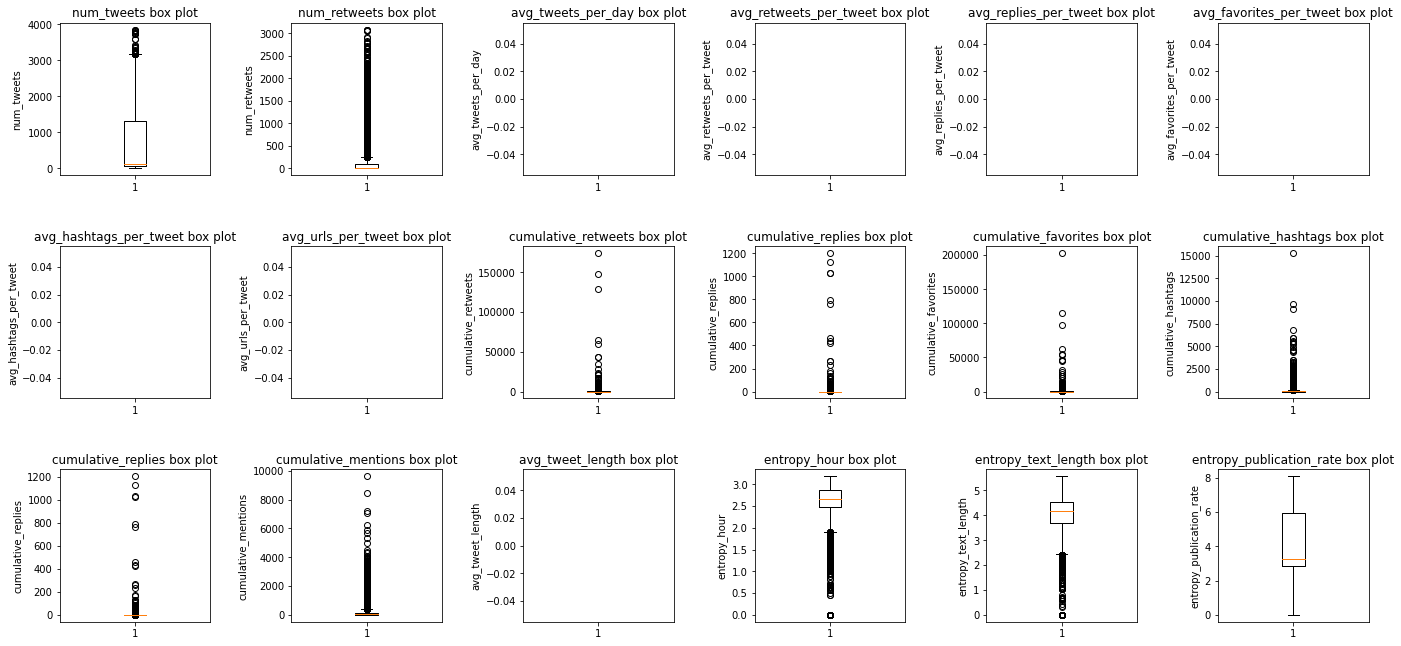

In [71]:
new_features = ['num_tweets', 'num_retweets', 'avg_tweets_per_day', 'avg_retweets_per_tweet', 'avg_replies_per_tweet', 'avg_favorites_per_tweet', 
                'avg_hashtags_per_tweet', 'avg_urls_per_tweet', 'cumulative_retweets', 'cumulative_replies', 'cumulative_favorites', 'cumulative_hashtags',
                'cumulative_replies', 'cumulative_mentions', 'avg_tweet_length', 'entropy_hour', 'entropy_text_length', 'entropy_publication_rate']

fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(20,10))
fig.tight_layout(pad=5.0)

for i, row in enumerate(np.reshape(new_features, (3,6))):
  for j, feature in enumerate(row):
    ax[i][j].boxplot(users_df[feature])
    ax[i][j].set_title('{} box plot'.format(feature))
    ax[i][j].set_ylabel(feature)

plt.show()

Analyzing the users which have some possible outlier values they all seem informative for an user profilation, so I kept them.  
Regarding the entropy features it is clear that if a user has 1 or 0 tweets associated, it will have the entropy equivalent to 0.

### **Fill missing values for new features**

If the user has no associated tweets (num_tweets is equal to 0), the new introduced features that represent an average per tweet will contain a NaN value. To resolve this, it is reasonable to fill the NaN values with the value 0.

In [72]:
nancols = ['avg_tweets_per_day', 'avg_retweets_per_tweet', 'avg_replies_per_tweet', 'avg_favorites_per_tweet', 'avg_hashtags_per_tweet', 'avg_mentions_per_tweet', 'avg_urls_per_tweet', 'avg_tweet_length']
users_df[nancols] = users_df[nancols].fillna(0)

In [73]:
users_df.isna().any()

id                          False
name                        False
lang                        False
bot                         False
created_at                  False
statuses_count              False
num_tweets                  False
num_retweets                False
avg_tweets_per_day          False
avg_retweets_per_tweet      False
avg_replies_per_tweet       False
avg_favorites_per_tweet     False
avg_hashtags_per_tweet      False
avg_mentions_per_tweet      False
avg_urls_per_tweet          False
cumulative_retweets         False
cumulative_replies          False
cumulative_favorites        False
cumulative_hashtags         False
cumulative_urls             False
cumulative_mentions         False
avg_tweet_length            False
entropy_hour                False
entropy_text_length         False
entropy_publication_rate    False
dtype: bool

### **New features distribution & statistics**

Most of new features show a distribution still highly skewed towards zero, as expected. They are not very informative, but we can see a more spread distribution for the features num_tweets, avg_text_length, entropy_hour and entropy_text_length.

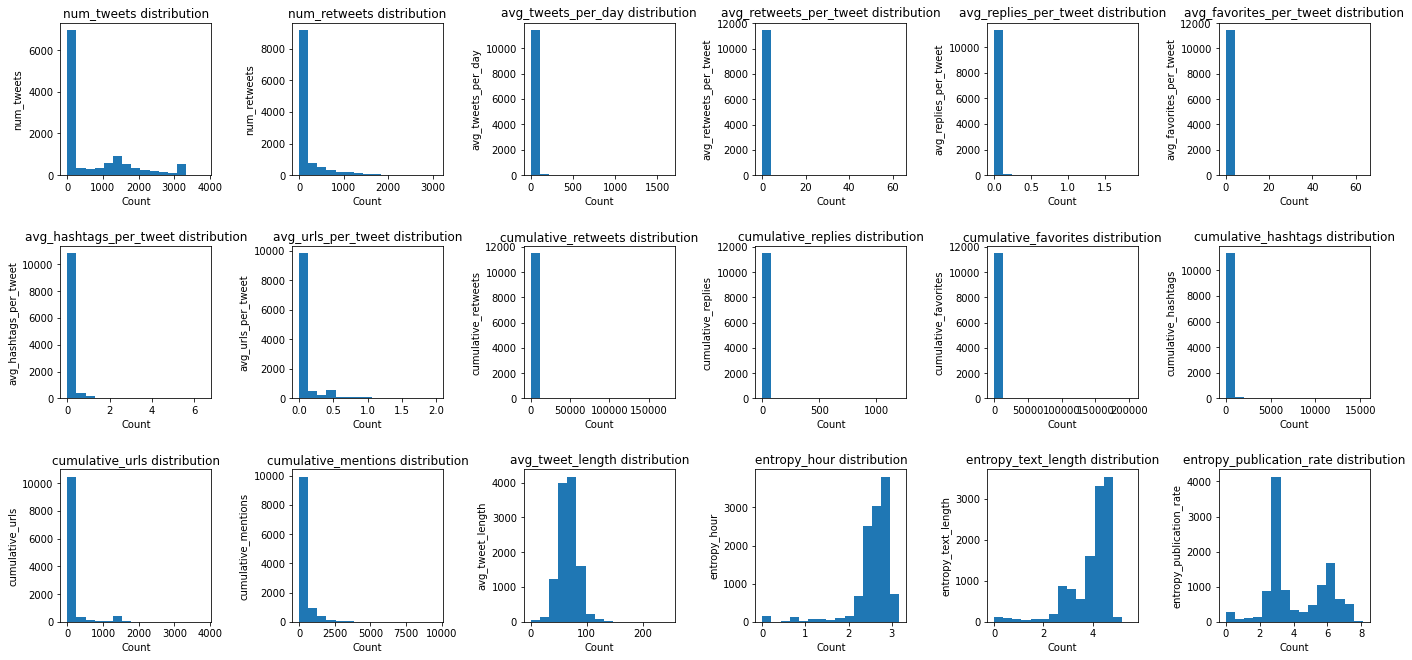

In [74]:
new_features = ['num_tweets', 'num_retweets', 'avg_tweets_per_day', 'avg_retweets_per_tweet', 'avg_replies_per_tweet', 'avg_favorites_per_tweet', 
                'avg_hashtags_per_tweet', 'avg_urls_per_tweet', 'cumulative_retweets', 'cumulative_replies', 'cumulative_favorites', 'cumulative_hashtags',
                'cumulative_urls', 'cumulative_mentions', 'avg_tweet_length', 'entropy_hour', 'entropy_text_length', 'entropy_publication_rate']

fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(20,10))
fig.tight_layout(pad=5.0)

for i, row in enumerate(np.reshape(new_features, (3,6))):
  for j, feature in enumerate(row):
    ax[i][j].hist(users_df[feature], bins='sturges')
    ax[i][j].set_title('{} distribution'.format(feature))
    ax[i][j].set_xlabel('Count')
    ax[i][j].set_ylabel(feature)

plt.show()

If we try to compare the distribution of genuine vs bot users with respect to the four promising features listed above, we can see that in fact the distribution are different depending on the bot label.  
For example, for the num_tweets feature we can derive that the number of bots with 0 tweets is twice the number of genuine users with 0 tweets.  
If instead we consider the entropy characterizing the hour of publication, the bots seems to have a more fixed variability (around 2.8) with respect to genuine users.

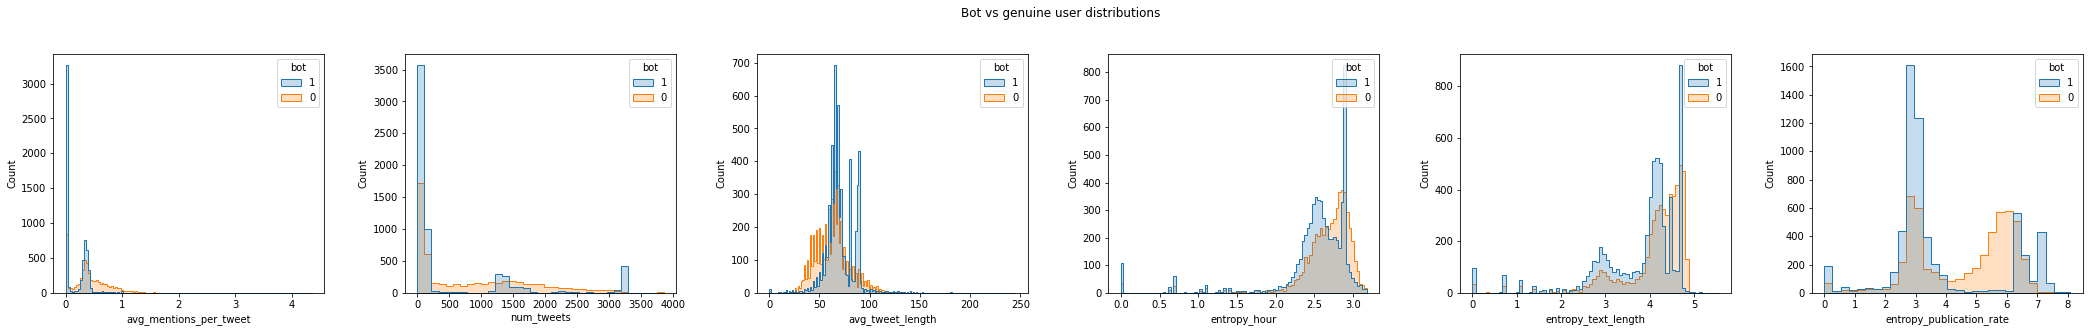

In [75]:
features = ['avg_mentions_per_tweet', 'num_tweets', 'avg_tweet_length', 'entropy_hour', 'entropy_text_length', 'entropy_publication_rate']

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(30,5))
fig.suptitle('Bot vs genuine user distributions')
fig.tight_layout(pad=5.0)

for i, feature in enumerate(features):
    sn.histplot(users_df, x=feature, hue='bot', element='step', ax=ax[i])
plt.show()




Comparing the interquartile ranges of the features for the genuine and bot users we can see a general lower activity for bots. It is possible to see this for example in the number of tweets per user, or in the number of retweets or in the number of likes received, which values are all considerably lower for the bots.  
Concerning instead the entropy features, it is interesting to see a slightly higher variability for the bots. If we investigate into it anyway, it is possible to see from the mean value a more realistic ratio, where the genuine users have an higher mean variability. We can also say that the mean is a more appropriate estimate for the entropy features, given the limited presence of outliers for these attributes.

In [76]:
genuine_describe = users_df[users_df['bot'] == '0'].describe()
bot_describe = users_df[users_df['bot'] == '1'].describe()

q_1_genuine = genuine_describe.iloc[4]
q_3_genuine = genuine_describe.iloc[6]

q_1_bot = bot_describe.iloc[4]
q_3_bot = bot_describe.iloc[6]

iqr_genuine = q_3_genuine - q_1_genuine
iqr_bot = q_3_bot - q_1_bot

iqr_genuine['bot'] = 'Genuine'
iqr_bot['bot'] = 'Bot'

iqr_genuine

iqrs_df = pd.DataFrame(data=[iqr_genuine, iqr_bot], columns=genuine_describe.columns)
iqrs_df['bot'] = ['Genuine', 'Bot']
iqrs_df = iqrs_df.set_index('bot')
iqrs_df

,statuses_count,num_tweets,num_retweets,avg_tweets_per_day,avg_retweets_per_tweet,avg_replies_per_tweet,avg_favorites_per_tweet,avg_hashtags_per_tweet,avg_mentions_per_tweet,avg_urls_per_tweet,cumulative_retweets,cumulative_replies,cumulative_favorites,cumulative_hashtags,cumulative_urls,cumulative_mentions,avg_tweet_length,entropy_hour,entropy_text_length,entropy_publication_rate
bot,,,,,,,,,,,,,,,,,,,,
Genuine,10108.75,1416.25,467.0,4.578034,0.139947,0.0,0.398440,0.166302,0.372766,0.085311,185.00,0.0,513.25,138.0,85.00,698.0,20.0,0.339035,0.622202,2.936321
Bot,46.00,261.25,1.0,1.488067,0.060410,0.0,0.074627,0.075574,0.336735,0.022419,9.25,0.0,13.00,10.0,12.25,35.0,18.0,0.403658,1.080095,1.496654


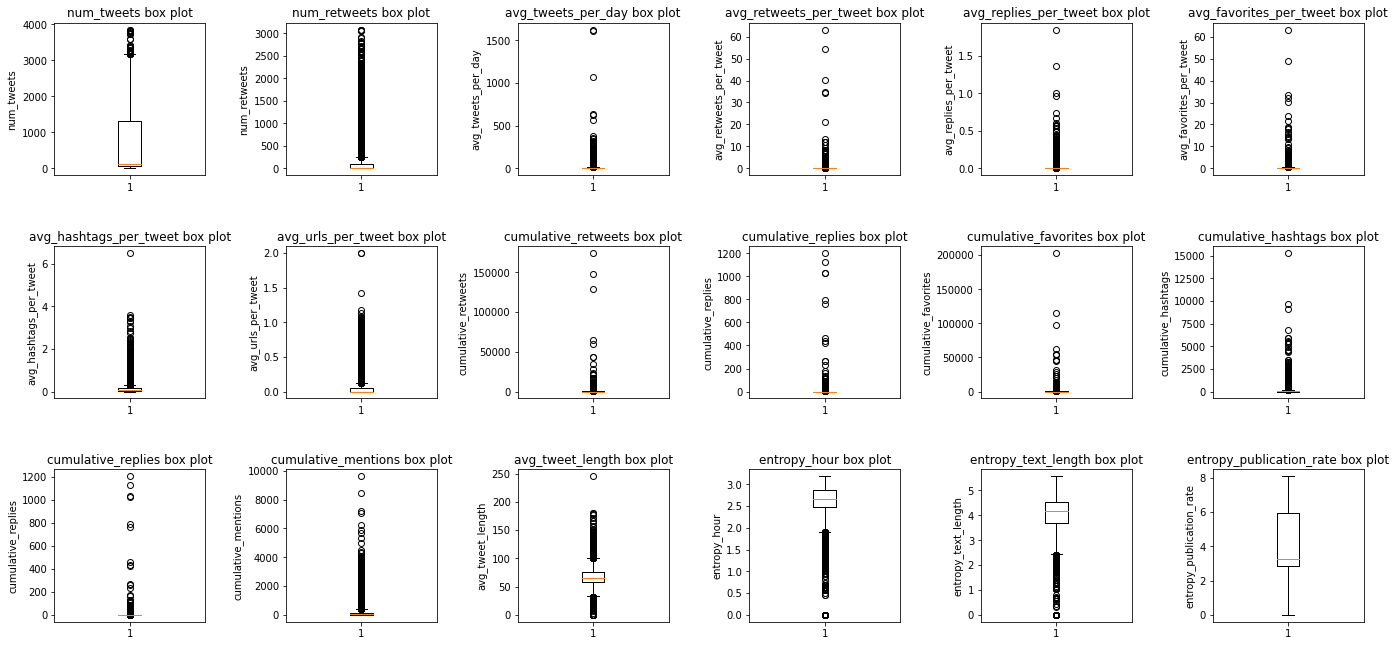

In [77]:
new_features = ['num_tweets', 'num_retweets', 'avg_tweets_per_day', 'avg_retweets_per_tweet', 'avg_replies_per_tweet', 'avg_favorites_per_tweet', 
                'avg_hashtags_per_tweet', 'avg_urls_per_tweet', 'cumulative_retweets', 'cumulative_replies', 'cumulative_favorites', 'cumulative_hashtags',
                'cumulative_replies', 'cumulative_mentions', 'avg_tweet_length', 'entropy_hour', 'entropy_text_length', 'entropy_publication_rate']

fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(20,10))
fig.tight_layout(pad=5.0)

for i, row in enumerate(np.reshape(new_features, (3,6))):
  for j, feature in enumerate(row):
    ax[i][j].boxplot(users_df[feature])
    ax[i][j].set_title('{} box plot'.format(feature))
    ax[i][j].set_ylabel(feature)

plt.show()

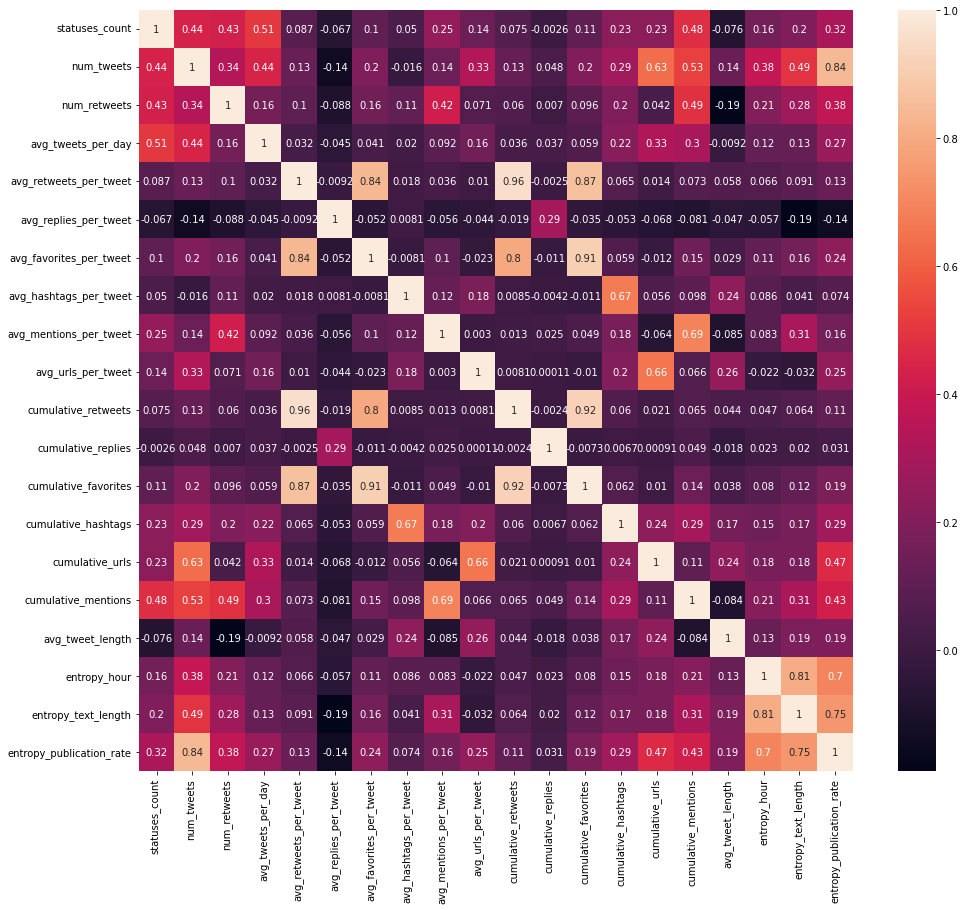

In [78]:
fig, ax = plt.subplots(figsize=(16,14))
sn.heatmap(users_df.corr(), annot=True)
plt.show()

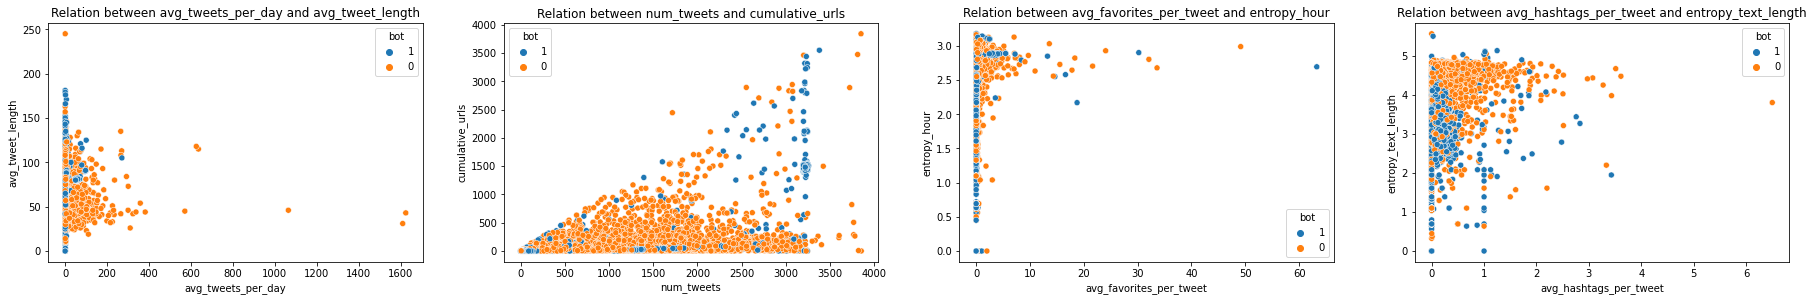

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(26,5))
fig.tight_layout(pad=5.0)

sn.scatterplot(data=users_df, x='avg_tweets_per_day', y='avg_tweet_length', hue='bot', ax=ax[0])
ax[0].set_title('Relation between avg_tweets_per_day and avg_tweet_length')

sn.scatterplot(data=users_df, x='num_tweets', y='cumulative_urls', hue='bot', ax=ax[1])
ax[1].set_title('Relation between num_tweets and cumulative_urls')

sn.scatterplot(data=users_df, x='avg_favorites_per_tweet', y='entropy_hour', hue='bot', ax=ax[2])
ax[2].set_title('Relation between avg_favorites_per_tweet and entropy_hour')

sn.scatterplot(data=users_df, x='avg_hashtags_per_tweet', y='entropy_text_length', hue='bot', ax=ax[3])
ax[3].set_title('Relation between avg_hashtags_per_tweet and entropy_text_length')

plt.show()

# **Export data set**

The users data set obtained after the phases explained above, including the new introduced features, is exported in a .csv file named 'users_edited.csv'.

In [80]:
users_df = users_df.set_index('id')

In [81]:
users_df.to_csv(path_or_buf='./users_edited.csv')

Also the cleaned tweets data set has been exported in a .csv file, named 'tweets_edited.csv'.

In [83]:
tweets_df.to_csv(path_or_buf='./tweets_edited.csv')